## Data Science : Real Estate Capstone Project

This project was completed as a part of Simplilearn Data Science Course end Project.

In this project, we will analyze a dataset Real Estate Dataset.

### Problem Statement

- A banking institution requires actionable insights into mortgage-backed securities, geographic business investment, and real estate analysis.
- The mortgage bank would like to identify potential monthly mortgage expenses for each region based on monthly family income and rental of the real estate.
- A statistical model needs to be created to predict the potential demand in dollars amount of loan for each of the region in the USA. Also, there is a need to create a dashboard which would refresh periodically post data retrieval from the agencies.
- The dashboard must demonstrate relationships and trends for the key metrics as follows: number of loans, average rental income, monthly mortgage and owner’s cost, family income vs mortgage cost comparison across different regions. The metrics described here do not limit the dashboard to these few.

In [1]:
#Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the train data
df_train = pd.read_csv("train.csv");

In [3]:
#import the test data
df_test = pd.read_csv("test.csv")

- Check shape of the dataset

In [4]:
df_train.shape

(27321, 80)

In [5]:
df_test.shape

(11709, 80)

- View the Data and columns

In [6]:
df_train.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [7]:
df_train.columns


Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [8]:
#Describe the Statistics of dataset
df_train.describe()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,27321.000000,0.0,27321.0,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,2.732100e+04,...,27115.000000,27115.000000,27115.000000,27115.000000,27115.000000,27053.000000,27130.000000,27130.000000,27130.000000,27130.000000
mean,257331.996303,NaN,140.0,85.646426,28.271806,50081.999524,596.507668,37.508813,-91.288394,1.295106e+08,...,40.319803,40.355099,22.178745,544.238432,2208.761903,0.640434,0.508300,0.047537,0.019089,0.100248
std,21343.859725,NaN,0.0,98.333097,16.392846,29558.115660,232.497482,5.588268,16.343816,1.275531e+09,...,5.886317,8.039585,2.540257,283.546896,1089.316999,0.226640,0.136860,0.037640,0.020796,0.049055
min,220342.000000,NaN,140.0,1.000000,1.000000,602.000000,201.000000,17.929085,-165.453872,4.113400e+04,...,16.008330,13.250000,0.556780,0.664700,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238816.000000,NaN,140.0,29.000000,13.000000,26554.000000,405.000000,33.899064,-97.816067,1.799408e+06,...,36.892050,34.916670,21.312135,355.995825,1471.000000,0.502780,0.425102,0.020810,0.004530,0.065800
50%,257220.000000,NaN,140.0,63.000000,28.000000,47715.000000,614.000000,38.755183,-86.554374,4.866940e+06,...,40.373320,40.583330,22.514410,503.643890,2066.000000,0.690840,0.526665,0.038840,0.013460,0.095205
75%,275818.000000,NaN,140.0,109.000000,42.000000,77093.000000,801.000000,41.380606,-79.782503,3.359820e+07,...,43.567120,45.416670,23.575260,680.275055,2772.000000,0.817460,0.605760,0.065100,0.027487,0.129000
max,294334.000000,NaN,140.0,840.000000,72.000000,99925.000000,989.000000,67.074018,-65.379332,1.039510e+11,...,79.837390,82.250000,30.241270,6197.995200,27250.000000,1.000000,1.000000,0.714290,0.714290,1.000000


In [9]:
#Information of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [10]:
# Indexing the dataset with UID
df_train.set_index(keys=["UID"], inplace=True)
df_test.set_index(keys=["UID"], inplace=True)

In [11]:
df_train.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


- Handling missing values

In [12]:
df_train.isnull().sum().any()

True

In [13]:
df_test.isnull().sum().any()

True

In [14]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

BLOCKID                        27321
rent_mean                        314
rent_median                      314
rent_stdev                       314
rent_sample_weight               314
rent_samples                     314
rent_gt_10                       314
rent_gt_15                       314
rent_gt_20                       314
rent_gt_25                       314
rent_gt_30                       314
rent_gt_35                       314
rent_gt_40                       314
rent_gt_50                       314
hi_mean                          268
hi_median                        268
hi_stdev                         268
hi_sample_weight                 268
hi_samples                       268
family_mean                      298
family_median                    298
family_stdev                     298
family_sample_weight             298
family_samples                   298
hc_mortgage_mean                 573
hc_mortgage_median               573
hc_mortgage_stdev                573
h

In [15]:
df_train.isnull().sum()[df_train.isnull().sum()>0].shape

(59,)

In [16]:
# calculate percentage of missing values in each col
percent_train=df_train.isnull().sum()/len(df_train)*100
df_percent_train=pd.DataFrame(percent_train,columns=['Percentage of Missing values'])
df_percent_train

,Percentage of Missing values
BLOCKID,100.000000
SUMLEVEL,0.000000
COUNTYID,0.000000
STATEID,0.000000
state,0.000000
...,...
pct_own,0.980930
married,0.699096
married_snp,0.699096
separated,0.699096


In [17]:
df_percent_train.sort_values(by=['Percentage of Missing values'],inplace=True,ascending=False)

In [18]:
df_percent_train

,Percentage of Missing values
BLOCKID,100.000000
hc_samples,2.196113
hc_mean,2.196113
hc_median,2.196113
hc_stdev,2.196113
...,...
state,0.000000
zip_code,0.000000
city,0.000000
place,0.000000


In [19]:
# calculate percentage of missing values in each col for test
percent_test=df_test.isnull().sum()/len(df_test)*100
df_percent_test=pd.DataFrame(percent_test,columns=['Percentage of Missing values'])
df_percent_test

,Percentage of Missing values
BLOCKID,100.000000
SUMLEVEL,0.000000
COUNTYID,0.000000
STATEID,0.000000
state,0.000000
...,...
pct_own,1.041934
married,0.717397
married_snp,0.717397
separated,0.717397


In [20]:
df_percent_test.sort_values(by=['Percentage of Missing values'],inplace=True,ascending=False)

In [21]:
df_percent_test

,Percentage of Missing values
BLOCKID,100.000000
hc_samples,2.476727
hc_mean,2.476727
hc_median,2.476727
hc_stdev,2.476727
...,...
type,0.000000
place,0.000000
city,0.000000
state,0.000000


In [22]:
#Drop two column BLOCKID, SUM level
df_train.drop(columns=['BLOCKID', 'SUMLEVEL'], axis=1, inplace=True)

In [23]:
df_train.head()

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
246444,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
245683,63,18,Indiana,IN,Danville,Danville,City,tract,46122,317,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
279653,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,787,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
247218,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [24]:
df_test.drop(columns=['BLOCKID', 'SUMLEVEL'], axis=1, inplace=True)

In [25]:
#Columns in train data which are missing values

missing_values_train = []

for col in df_train.columns:
    if df_train[col].isnull().sum() != 0:
        missing_values_train.append(col)

In [26]:
missing_values_train

['rent_mean',
 'rent_median',
 'rent_stdev',
 'rent_sample_weight',
 'rent_samples',
 'rent_gt_10',
 'rent_gt_15',
 'rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'hi_mean',
 'hi_median',
 'hi_stdev',
 'hi_sample_weight',
 'hi_samples',
 'family_mean',
 'family_median',
 'family_stdev',
 'family_sample_weight',
 'family_samples',
 'hc_mortgage_mean',
 'hc_mortgage_median',
 'hc_mortgage_stdev',
 'hc_mortgage_sample_weight',
 'hc_mortgage_samples',
 'hc_mean',
 'hc_median',
 'hc_stdev',
 'hc_samples',
 'hc_sample_weight',
 'home_equity_second_mortgage',
 'second_mortgage',
 'home_equity',
 'debt',
 'second_mortgage_cdf',
 'home_equity_cdf',
 'debt_cdf',
 'hs_degree',
 'hs_degree_male',
 'hs_degree_female',
 'male_age_mean',
 'male_age_median',
 'male_age_stdev',
 'male_age_sample_weight',
 'male_age_samples',
 'female_age_mean',
 'female_age_median',
 'female_age_stdev',
 'female_age_sample_weight',
 'female_age_samples',
 'pct_own',
 'married'

In [27]:
#Columns in train data which are missing values for test data

missing_values_test = []

for col in df_test.columns:
    if df_test[col].isnull().sum() != 0:
        missing_values_test.append(col)

In [28]:
missing_values_test

['rent_mean',
 'rent_median',
 'rent_stdev',
 'rent_sample_weight',
 'rent_samples',
 'rent_gt_10',
 'rent_gt_15',
 'rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'hi_mean',
 'hi_median',
 'hi_stdev',
 'hi_sample_weight',
 'hi_samples',
 'family_mean',
 'family_median',
 'family_stdev',
 'family_sample_weight',
 'family_samples',
 'hc_mortgage_mean',
 'hc_mortgage_median',
 'hc_mortgage_stdev',
 'hc_mortgage_sample_weight',
 'hc_mortgage_samples',
 'hc_mean',
 'hc_median',
 'hc_stdev',
 'hc_samples',
 'hc_sample_weight',
 'home_equity_second_mortgage',
 'second_mortgage',
 'home_equity',
 'debt',
 'second_mortgage_cdf',
 'home_equity_cdf',
 'debt_cdf',
 'hs_degree',
 'hs_degree_male',
 'hs_degree_female',
 'male_age_mean',
 'male_age_median',
 'male_age_stdev',
 'male_age_sample_weight',
 'male_age_samples',
 'female_age_mean',
 'female_age_median',
 'female_age_stdev',
 'female_age_sample_weight',
 'female_age_samples',
 'pct_own',
 'married'

In [29]:
for col in df_train.columns:
    if col in missing_values_train:
        df_train[col].replace(np.nan, df_train[col].mean(), inplace=True)
    

In [30]:
for col in df_test.columns:
    if col in missing_values_test:
        df_test[col].replace(np.nan, df_test[col].mean(), inplace=True)

In [31]:
df_train.isnull().sum().any()

False

In [32]:
df_test.isnull().sum().any()

False

## EDA(Exploratory Data Analysis)

In [33]:
#import sqldf
from pandasql import sqldf

In [34]:
df_train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [35]:
#Write the sql query
q1 = "select place, pct_own, second_mortgage, lat, lng from df_train where pct_own>0.10 and second_mortgage < 0.5 order by second_mortgage DESC LIMIT 2500;"

In [36]:
Query_fun = lambda q:sqldf(q, globals())
df_train_location = Query_fun(q1)

In [37]:
df_train_location

,place,pct_own,second_mortgage,lat,lng
0,Worcester City,0.20247,0.43363,42.254262,-71.800347
1,Harbor Hills,0.15618,0.31818,40.751809,-73.853582
2,Glen Burnie,0.22380,0.30212,39.127273,-76.635265
3,Egypt Lake-leto,0.11618,0.28972,28.029063,-82.495395
4,Lincolnwood,0.14228,0.28899,41.967289,-87.652434
...,...,...,...,...,...
2495,Marina Del Rey,0.44682,0.06818,33.983203,-118.466139
2496,Raleigh City,0.12827,0.06818,35.757135,-78.704288
2497,Lochearn,0.84707,0.06815,39.353095,-76.733315
2498,Manteca City,0.67116,0.06814,37.732143,-121.242902


In [38]:
#Calculate the bad_debit
df_train['bad_debt']=df_train['second_mortgage']+df_train['home_equity']-df_train['home_equity_second_mortgage']

In [39]:
df_train.head()

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt
UID,,,,,,,,,,,,,,,,,,,,,
267822,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,...,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,0.09408
246444,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574,...,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,0.04274
245683,63,18,Indiana,IN,Danville,Danville,City,tract,46122,317,...,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,0.09512
279653,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,787,...,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,0.01086
247218,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785,...,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,0.05426


In [40]:
df_train['city']

UID
267822       Hamilton
246444     South Bend
245683       Danville
279653       San Juan
247218      Manhattan
             ...     
279212          Coamo
277856      Blue Bell
233000        Weldona
287425    Colleyville
265371      Las Vegas
Name: city, Length: 27321, dtype: object

In [41]:
#Create the differnt cities dataframe
df_ham = df_train.loc[df_train['city'] == 'Hamilton']
df_man = df_train.loc[df_train['city'] == 'Manhattan']

In [42]:
#Combined the two cities dataset
df_box_city = pd.concat([df_ham, df_man])

In [43]:
df_box_city.head()

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt
UID,,,,,,,,,,,,,,,,,,,,,
267822,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315,...,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,0.09408
263797,21,34,New Jersey,NJ,Hamilton,Yardville,City,tract,8610,609,...,55.00000,24.05831,732.58443,3124.0,0.64400,0.56377,0.01980,0.00990,0.04892,0.18071
270979,17,39,Ohio,OH,Hamilton,Hamilton City,Village,tract,45015,513,...,31.66667,22.66500,565.32725,2528.0,0.61278,0.47397,0.04419,0.02663,0.13741,0.15005
259028,95,28,Mississippi,MS,Hamilton,Hamilton,CDP,tract,39746,662,...,35.91667,22.79602,483.01311,1954.0,0.83241,0.58678,0.01052,0.00000,0.11721,0.02130
270984,17,39,Ohio,OH,Hamilton,New Miami,Village,tract,45013,513,...,52.33333,24.55724,682.81171,2912.0,0.63194,0.55697,0.01322,0.00000,0.15209,0.15651


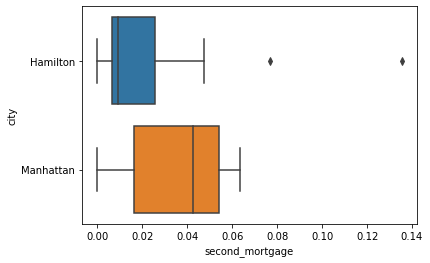

In [44]:
# create a boxplot city & second mortgage 
sns.boxplot(data=df_box_city,x='second_mortgage',y='city') 
plt.show()

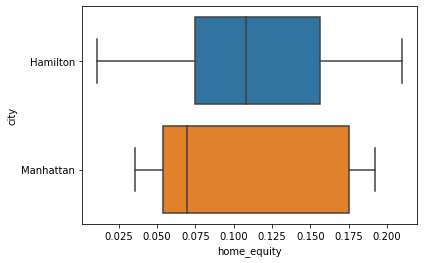

In [45]:
# create a boxplot city & home_equity 
sns.boxplot(data=df_box_city,x='home_equity',y='city') 
plt.show()

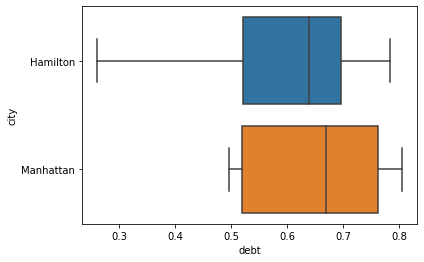

In [46]:
# create a boxplot city & debt 
sns.boxplot(data=df_box_city,x='debt',y='city') 
plt.show()

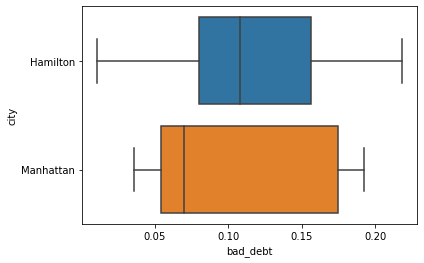

In [47]:
# create a boxplot city & debt 
sns.boxplot(data=df_box_city,x='bad_debt',y='city') 
plt.show()

In [48]:
df_train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

Text(0.5, 1.0, 'Family Income')

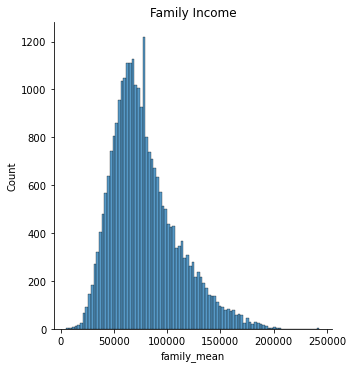

In [49]:
# create a distplot of family income
sns.displot(df_train['family_mean'])
plt.title("Family Income")

Text(0.5, 1.0, 'House Hold Income')

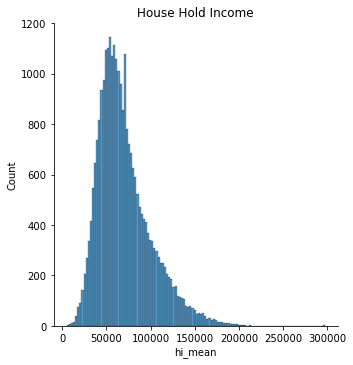

In [50]:
# create a distplot of Household income
sns.displot(df_train['hi_mean'])
plt.title("House Hold Income")

Text(0.5, 1.0, 'Remaining Income')

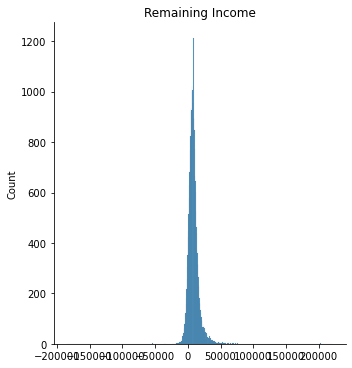

In [51]:
# create a distplot of remaining income
sns.displot(df_train['family_mean'] - df_train['hi_mean'])
plt.title("Remaining Income")

In [52]:
df_train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

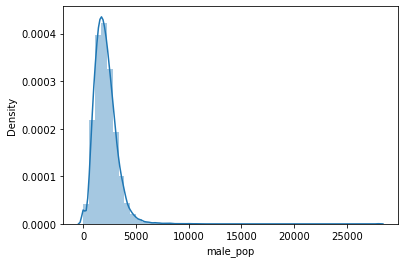

In [53]:
sns.distplot(df_train["male_pop"]);

<AxesSubplot:xlabel='pop', ylabel='Density'>

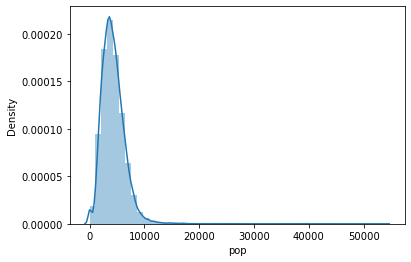

In [54]:
sns.distplot(df_train["pop"])


<AxesSubplot:xlabel='female_pop', ylabel='Density'>

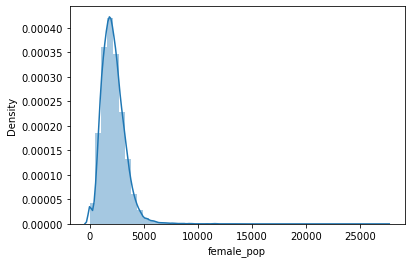

In [55]:
sns.distplot(df_train["female_pop"])

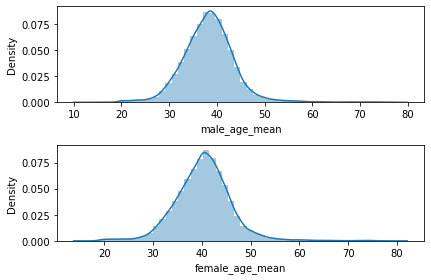

In [56]:
#Create a distplot of male_age_mean & female_age_mean
fig,(ax1,ax2)=plt.subplots(2,1)
plt.subplots_adjust(wspace=0.8,hspace=0.9)
sns.distplot(df_train['male_age_mean'],ax=ax1)
sns.distplot(df_train['female_age_mean'],ax=ax2)
plt.tight_layout()
plt.show()

In [57]:
df_train['pop_density']=df_train['pop']/df_train['ALand']

In [58]:
df_train['pop_density']

UID
267822    0.000026
246444    0.001687
245683    0.000099
279653    0.002442
247218    0.002207
            ...   
279212    0.002650
277856    0.000818
233000    0.000002
287425    0.000619
265371    0.000478
Name: pop_density, Length: 27321, dtype: float64

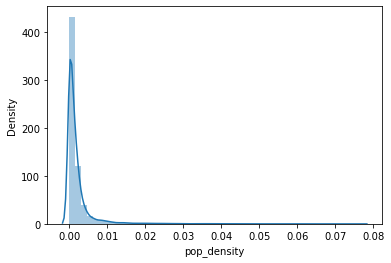

In [59]:
# check population density
sns.distplot(df_train['pop_density'])
plt.show()

In [60]:
df_train['age_median']=(df_train['male_age_median']+df_train['female_age_median'])/2

In [61]:
df_test['age_median']=(df_test['male_age_median']+df_test['female_age_median'])/2

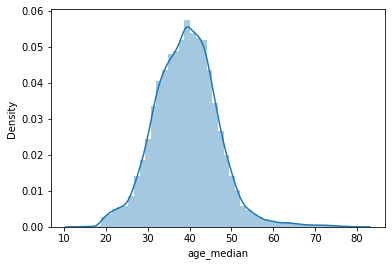

In [62]:
# Visualize Age median
sns.distplot(df_train['age_median'])
plt.show()

In [63]:
#Create a function
def func(num):
    if num < 7000:
        return 'low'

In [64]:
#apply the function
df_train['pop_bins'] = df_train['pop'].apply(func)

In [65]:
df_train['pop_bins']=pd.cut(df_train['pop'],bins=5,labels=['very low','low','medium','high','very high'])

In [66]:
df_train['pop_bins'].value_counts()


very low     27058
low            246
medium           9
high             7
very high        1
Name: pop_bins, dtype: int64

In [67]:
df_train['pop_bins'].describe()

count        27321
unique           5
top       very low
freq         27058
Name: pop_bins, dtype: object

<AxesSubplot:>

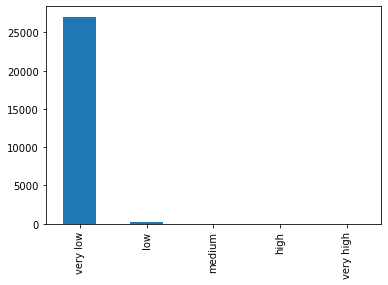

In [68]:
#Create a bar chart of pop_bins counts
df_train['pop_bins'].value_counts().plot(kind='bar')

In [69]:
df_train.groupby(by='pop_bins')[['married','separated', 'divorced']].count()

,married,separated,divorced
pop_bins,,,
very low,27058,27058,27058
low,246,246,246
medium,9,9,9
high,7,7,7
very high,1,1,1


In [70]:
#Grouping the pop_bins with aggregate function
df_train.groupby(by='pop_bins')[['married','separated', 'divorced']].agg(['sum','mean','median','count'])

married                             separated            \
                   sum      mean    median  count        sum      mean   
pop_bins                                                                 
very low   13733.22489  0.507548  0.524680  27058  517.52126  0.019126   
low          143.88385  0.584894  0.593135    246    3.89480  0.015833   
medium         5.90163  0.655737  0.618710      9    0.04503  0.005003   
high           3.52351  0.503359  0.335660      7    0.05699  0.008141   
very high      0.73474  0.734740  0.734740      1    0.00405  0.004050   

                               divorced                             
             median  count          sum      mean    median  count  
pop_bins                                                            
very low   0.013650  27058  2719.430721  0.100504  0.096020  27058  
low        0.011195    246    18.535600  0.075348  0.070045    246  
medium     0.004120      9     0.593340  0.065927  0.064890      9  
high       0.002500      7     0.273210  0.039030  0.010320      7  
very high  0.004050      1     0.030360  0.030360  0.030360      1

<AxesSubplot:xlabel='pop_bins'>

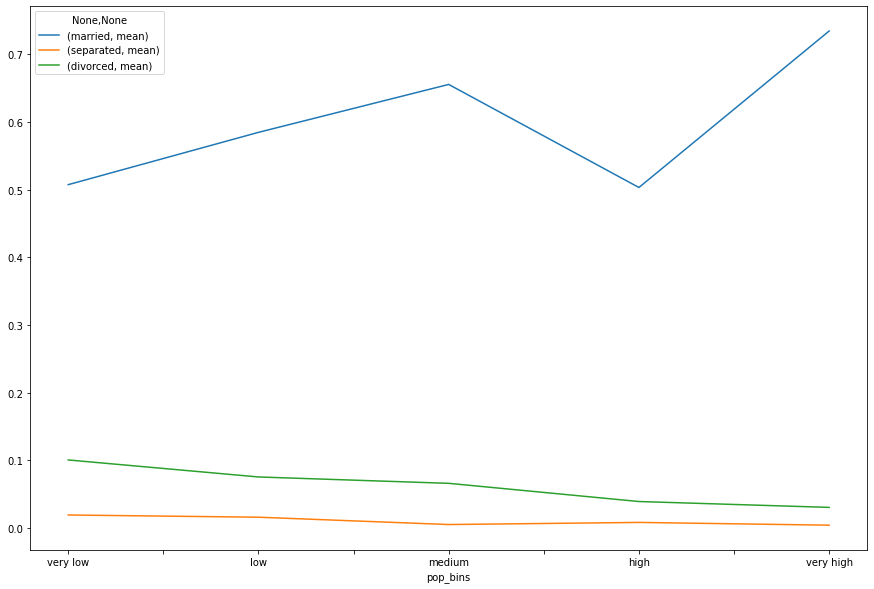

In [71]:
df_train.groupby(by='pop_bins')[['married','separated', 'divorced']].agg(['mean']).plot(figsize=(15,10))

In [72]:
rent_state_mean =df_train.groupby(by='state')['rent_mean'].agg(["mean"])

In [73]:
rent_state_mean

,mean
state,
Alabama,774.004927
Alaska,1185.763570
Arizona,1097.753511
Arkansas,720.918575
California,1471.133857
Colorado,1198.191514
Connecticut,1317.100534
Delaware,1127.309811
District of Columbia,1417.097934


In [74]:
income_state_mean = df_train.groupby(by='state')['family_mean'].agg(['mean'])

In [75]:
income_state_mean

,mean
state,
Alabama,67030.064213
Alaska,92136.545109
Arizona,73328.238798
Arkansas,64765.377850
California,87655.470820
Colorado,88562.685927
Connecticut,104228.444232
Delaware,87190.491455
District of Columbia,107372.316925


In [76]:
#calculate rent percentage
rent_perc = rent_state_mean['mean'] / income_state_mean['mean']

In [77]:
rent_perc.head()

state
Alabama       0.011547
Alaska        0.012870
Arizona       0.014970
Arkansas      0.011131
California    0.016783
Name: mean, dtype: float64

In [78]:
df_num = df_train.select_dtypes(exclude='object')

In [79]:
df_num.shape

(27321, 75)

In [80]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27321 entries, 267822 to 265371
Data columns (total 81 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   COUNTYID                     27321 non-null  int64   
 1   STATEID                      27321 non-null  int64   
 2   state                        27321 non-null  object  
 3   state_ab                     27321 non-null  object  
 4   city                         27321 non-null  object  
 5   place                        27321 non-null  object  
 6   type                         27321 non-null  object  
 7   primary                      27321 non-null  object  
 8   zip_code                     27321 non-null  int64   
 9   area_code                    27321 non-null  int64   
 10  lat                          27321 non-null  float64 
 11  lng                          27321 non-null  float64 
 12  ALand                        27321 non-null  float64 


In [81]:
#Checking the Corrletion
df_num.corr()

,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,...,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt,pop_density,age_median
COUNTYID,1.000000,0.224549,0.036527,0.067171,-0.149272,0.070414,0.015469,0.016550,-0.002662,-0.002615,...,0.004587,-0.001227,-0.004632,-0.021428,0.041710,0.069059,0.048850,-0.125892,-0.080509,-0.063521
STATEID,0.224549,1.000000,-0.261465,0.043718,0.109934,0.319964,-0.017275,-0.026476,-0.036599,-0.040351,...,-0.025104,-0.028238,0.069314,0.025763,-0.033283,0.030409,0.018748,-0.151007,-0.013671,-0.017172
zip_code,0.036527,-0.261465,1.000000,-0.004681,-0.070775,-0.926708,0.072711,0.031679,0.083058,0.099959,...,0.055497,0.059305,-0.069965,0.030217,0.020541,-0.048023,0.043310,-0.069348,-0.119014,-0.126150
area_code,0.067171,0.043718,-0.004681,1.000000,-0.125415,-0.013494,0.016563,0.021711,0.031834,0.034387,...,0.029857,0.031128,0.018877,0.057824,0.022687,0.022543,-0.043722,-0.003658,-0.030743,-0.017118
lat,-0.149272,0.109934,-0.070775,-0.125415,1.000000,0.025450,0.100498,0.067660,-0.078283,-0.072763,...,-0.080855,-0.087667,0.056487,0.035480,-0.158657,-0.138048,-0.056018,0.208792,0.054513,0.008246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
separated,0.069059,0.030409,-0.048023,0.022543,-0.138048,0.049228,-0.005904,-0.001208,-0.083182,-0.074929,...,-0.091913,-0.088709,-0.284877,-0.219686,0.668481,1.000000,0.133244,-0.151824,0.094859,-0.116763
divorced,0.048850,0.018748,0.043310,-0.043722,-0.056018,-0.004321,0.023381,0.007677,-0.160931,-0.146619,...,-0.198491,-0.169450,-0.095413,-0.267833,0.057364,0.133244,1.000000,-0.210203,-0.155328,0.164205
bad_debt,-0.125892,-0.151007,-0.069348,-0.003658,0.208792,-0.005876,-0.079618,-0.024112,0.099489,0.092085,...,0.078159,0.104039,0.134257,0.182985,-0.151008,-0.151824,-0.210203,1.000000,-0.005871,0.058892
pop_density,-0.080509,-0.013671,-0.119014,-0.030743,0.054513,0.066056,-0.044934,-0.013174,0.033740,0.020651,...,0.046016,0.040268,-0.426353,-0.248678,0.212778,0.094859,-0.155328,-0.005871,1.000000,-0.198546


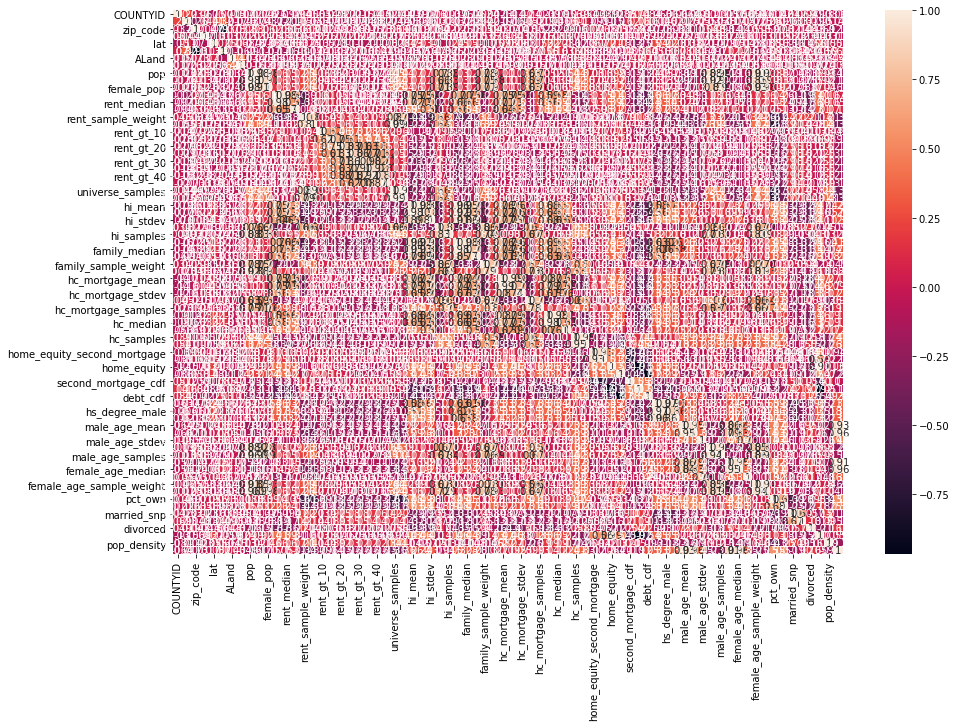

In [82]:
#Draw the heatmap for better corr
plt.figure(figsize=(15,10));
sns.heatmap(df_num.corr(), annot=True);

In [83]:
df_train.corr().nlargest(10, 'hc_mortgage_mean');

## Data Preprocessing

In [84]:
#import factor Analyzer
from factor_analyzer import FactorAnalyzer

In [85]:
fa = FactorAnalyzer(n_factors=5)


In [86]:
fa.fit_transform(df_train.select_dtypes(exclude=('object', 'category')))

array([[-0.40745842,  0.61756245,  0.81253022, -1.10356277,  0.31103685],
       [-1.03709457, -0.66390368, -0.2236807 ,  0.08679349,  0.3952024 ],
       [ 0.09716789,  1.2080874 ,  0.73457152, -0.48853078, -0.36524535],
       ...,
       [-0.02774459, -0.70406951,  0.76595405, -1.39949389,  0.03963021],
       [ 2.51586956,  3.12876937,  1.24983872, -0.08315257, -1.59629039],
       [-0.23210057, -0.0767019 , -1.37637636,  0.23391539, -0.07777431]])

## Data Modelling

In [87]:
# convert type column into numerical data
df_train.replace({'City':1,'Town':2,'CDP':3,'Village':4,'Borough':5,'Urban':6},inplace=True)

In [88]:
# convert type column into numerical data 
df_test.replace({'City':1,'Town':2,'CDP':3,'Village':4,'Borough':5,'Urban':6},inplace=True)

In [89]:
input_cols=['COUNTYID', 'STATEID','type','zip_code','pop','family_mean','second_mortgage', 'home_equity','debt','hs_degree','age_median','pct_own','married','separated', 'divorced']

In [90]:
x_train = df_train[input_cols]

In [91]:
x_train.head()

,COUNTYID,STATEID,type,zip_code,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,age_median,pct_own,married,separated,divorced
UID,,,,,,,,,,,,,,,
267822,53,36,1,13346,5230,67994.14790,0.02077,0.08919,0.52963,0.89288,44.666665,0.79046,0.57851,0.01240,0.08770
246444,141,18,1,46616,2633,50670.10337,0.02222,0.04274,0.60855,0.90487,34.791665,0.52483,0.34886,0.01426,0.09030
245683,63,18,1,46122,6881,95262.51431,0.00000,0.09512,0.73484,0.94288,41.833330,0.85331,0.64745,0.01607,0.10657
279653,127,72,6,927,2700,56401.68133,0.01086,0.01086,0.52714,0.91500,49.750000,0.65037,0.47257,0.02021,0.10106
247218,161,20,1,66502,5637,54053.42396,0.05426,0.05426,0.51938,1.00000,22.000000,0.13046,0.12356,0.00000,0.03109


In [92]:
y_train = df_train['hc_mortgage_mean']

In [93]:
y_train.head()

UID
267822    1414.80295
246444     864.41390
245683    1506.06758
279653    1175.28642
247218    1192.58759
Name: hc_mortgage_mean, dtype: float64

In [94]:
x_test = df_test[input_cols]
y_test = df_test['hc_mortgage_mean']

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [96]:
x_train_scaled = sc.fit_transform(x_train)

In [97]:
x_test_scaled = sc.fit_transform(x_test)

In [98]:
#apply linear regression model

from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

In [99]:
linear_reg.fit(x_train_scaled, y_train)

LinearRegression()

In [100]:
y_pred = linear_reg.predict(x_test_scaled)

In [101]:
y_pred

array([ 874.67481013, 1597.10903054, 1086.41351981, ..., 1915.00495942,
       1505.10480889, 1151.68011643])

In [102]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [103]:
print("Mean Squared Error", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error 325.0919574748077


In [104]:
print("R2 Score", r2_score(y_test, y_pred))

R2 Score 0.7315444045569977


RUN another model at State Level

In [105]:
df_train["STATEID"].unique()

array([36, 18, 72, 20,  1, 48, 45,  6,  5, 24, 17, 19, 47, 32, 22,  8, 44,
       28, 34, 41,  4, 12, 55, 42, 37, 51, 26, 39, 40, 13, 16, 46, 27, 29,
       53, 56,  9, 54, 21, 25, 11, 15, 30,  2, 33, 49, 50, 31, 38, 35, 23,
       10], dtype=int64)

In [106]:
for i in [20,1,15]:
    print("State Id --> ", i)
    
    x_train_nation = df_train[df_train['COUNTYID']==i][input_cols]
    y_train_nation = df_train[df_train['COUNTYID']==i]['hc_mortgage_mean']
    
    x_test_nation = df_test[df_test['COUNTYID']==i][input_cols]
    y_test_nation = df_test[df_test['COUNTYID']==i]['hc_mortgage_mean']
    
    x_train_scaled_nation=sc.fit_transform(x_train_nation) 
    x_test_scaled_nation=sc.fit_transform(x_test_nation)
    
    linear_reg.fit(x_train_scaled_nation,y_train_nation)
    
    yprd=linear_reg.predict(x_test_scaled_nation) 
    
    print('root Mean Squared error',np.sqrt(mean_squared_error(y_test_nation,yprd))) 
    print('R2 score',r2_score(y_test_nation,yprd))

State Id -->  20
root Mean Squared error 307.9718899931473
R2 score 0.6046603766461807
State Id -->  1
root Mean Squared error 307.7896199248689
R2 score 0.8104850042868166
State Id -->  15
root Mean Squared error 202.42332969015246
R2 score 0.8093725334377231
